# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime

%matplotlib inline

In [2]:
datetime.datetime.now().isoformat()

'2021-04-23T13:42:09.293427'

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

In [7]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60174.00
The current value of your 5.3 ETH is $12324.83


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [10]:
# Format current date as ISO format
# current_date = pd.Timestamp("2021-04-20", tz="America/New_York").isoformat()
current_date = datetime.datetime.now().isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start = current_date
).df

# Preview DataFrame
ticker_data

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2020-11-30 00:00:00-05:00  118.32  118.450  118.2500  118.400  5231566   
2020-12-01 00:00:00-05:00  118.03  118.100  117.7300  117.840  4308362   
2020-12-02 00:00:00-05:00  117.81  117.810  117.5400  117.705  5554915   
2020-12-03 00:00:00-05:00  117.92  117.980  117.7650  117.910  5210910   
2020-12-04 00:00:00-05:00  117.90  117.900  117.5133  117.580  4821820   
...                           ...      ...       ...      ...      ...   
2021-04-19 00:00:00-04:00  114.00  114.500  114.0000  114.440  4820664   
2021-04-20 00:00:00-04:00  114.42  114.670  114.3900  114.620  3674209   
2021-04-21 00:00:00-04:00  114.60  114.740  114.5300  114.740  5250384   
2021-04-22 00:00:00-04:00  114.74  114.800  114.5900  114.770  3518947   
2021-04-23 00:00:00-04:00  114.81  115.086  114.6415  114.775  2734191   

                              SPY                                        
                             open      high     low     close    volume  
time                                                                     
2020-11-30 00:00:00-05:00  362.83  363.1200  359.17  362.0000  67154075  
2020-12-01 00:00:00-05:00  365.57  367.6800  364.93  365.9700  64527332  
2020-12-02 00:00:00-05:00  364.82  366.9600  364.20  366.7599  37323404  
2020-12-03 00:00:00-05:00  366.68  368.1900  365.50  366.6698  52905586  
2020-12-04 00:00:00-05:00  367.32  369.8500  367.22  369.8300  40264568  
...                           ...       ...     ...       ...       ...  
2021-04-19 00:00:00-04:00  416.26  416.7400  413.79  415.2400  66226327  
2021-04-20 00:00:00-04:00  413.91  415.0859  410.59  412.2200  69715050  
2021-04-21 00:00:00-04:00  411.51  416.2900  411.36  416.0800  54772634  
2021-04-22 00:00:00-04:00  415.88  416.7800  411.13  412.3000  90086341  
2021-04-23 00:00:00-04:00  412.87  417.3600  412.79  417.3512  33980659  

[100 rows x 10 columns]

In [11]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data.iloc[0]['AGG']['close']
spy_close_price = ticker_data.iloc[0]['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.4
Current SPY closing price: $362.0


In [12]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18100.00
The current value of your 200 AGG shares is $23680.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_dict = {'amount':
    {
    'crypto':my_btc_value + my_eth_value,
    'shares':my_agg_value + my_spy_value
    }
}
df_savings = pd.DataFrame(savings_dict)

# Display savings DataFrame
display(df_savings)

,amount
crypto,72498.832
shares,41780.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

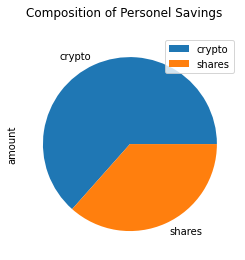

In [14]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, title='Composition of Personel Savings')

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.loc['crypto']['amount'] + df_savings.loc['shares']['amount']

# Validate saving health
if total_savings > emergency_fund:
    print('Congrats! You have more than enough savings!')
elif total_savings == emergency_fund:
    print('Congrats! You have reached your financial goal!')
elif total_savings < emergency_fund:
    print(f'Almost there. You just have to save ${emergency_fund-total_savings} to reach your goal.')


Congrats! You have more than enough savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
current_date=datetime.datetime.now()
start_date = datetime.datetime(current_date.year-5, current_date.month, current_date.day)

In [17]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date, 
    end=current_date, 
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-05-03 00:00:00-04:00  108.97  108.99  108.77  108.795  1765578.0     NaN   
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624.0  238.83   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794.0  239.18   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134.0  239.76   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343.0  239.96   

                                                                 
                               high     low   close      volume  
time                                                             
2017-05-03 00:00:00-04:00       NaN     NaN     NaN         NaN  
2017-05-04 00:00:00-04:00  238.9225  237.78  238.75  46170233.0  
2017-05-05 00:00:00-04:00  239.7200  238.68  239.72  43733544.0  
2017-05-08 00:00:00-04:00  239.9200  239.17  239.67  32087919.0  
2017-05-09 00:00:00-04:00  240.1900  239.04  239.46  39723891.0

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
MC_thirty_year = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40, .60],
    num_simulation=num_sims,
    num_trading_days=252*30
)

In [19]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-05-03 00:00:00-04:00  108.97  108.99  108.77  108.795  1765578.0   
2017-05-04 00:00:00-04:00  108.55  108.70  108.55  108.665  1789624.0   
2017-05-05 00:00:00-04:00  108.72  108.74  108.57  108.720  1287794.0   
2017-05-08 00:00:00-04:00  108.63  108.67  108.49  108.495  1579134.0   
2017-05-09 00:00:00-04:00  108.43  108.51  108.40  108.495  2395343.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-05-03 00:00:00-04:00          NaN     NaN       NaN     NaN     NaN   
2017-05-04 00:00:00-04:00    -0.001195  238.83  238.9225  237.78  238.75   
2017-05-05 00:00:00-04:00     0.000506  239.18  239.7200  238.68  239.72   
2017-05-08 00:00:00-04:00    -0.002070  239.76  239.9200  239.17  239.67   
2017-05-09 00:00:00-04:00     0.000000  239.96  240.1900  239.04  239.46   

                                                    
                               volume daily_return  
time                                                
2017-05-03 00:00:00-04:00         NaN          NaN  
2017-05-04 00:00:00-04:00  46170233.0          NaN  
2017-05-05 00:00:00-04:00  43733544.0     0.004063  
2017-05-08 00:00:00-04:00  32087919.0    -0.000209  
2017-05-09 00:00:00-04:00  39723891.0    -0.000876

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997749,1.012895,1.012707,0.983738,1.010196,0.991011,1.001249,1.013399,0.995459,0.999838,...,1.000260,0.986566,1.005657,0.985446,1.008087,0.994000,1.011717,0.992885,1.004364,1.007610
2,1.001853,0.999683,1.026500,0.986069,1.007549,0.995441,1.002366,1.012797,1.007718,0.996856,...,1.004742,0.998010,1.009145,0.976974,1.009239,1.001000,0.994169,0.985467,1.015510,0.999232
3,0.994523,1.004820,1.006838,0.989522,1.010428,0.980021,1.003546,1.002157,1.007724,0.991865,...,1.007663,0.993394,1.011864,0.980654,1.002784,1.009153,0.987175,0.992606,1.010785,1.002732
4,0.994232,0.998557,1.009481,0.987874,1.018121,0.964423,1.005615,0.991997,1.001906,0.986306,...,1.025736,0.994830,1.009312,1.003074,0.990617,1.002313,0.991053,0.993615,1.021181,0.998666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.310704,22.826126,14.751169,63.611493,41.220896,21.671729,6.932775,9.720717,6.591193,8.422372,...,9.779447,29.822831,8.089565,14.088225,13.873925,12.390072,31.520222,17.892871,33.614417,20.490936
7557,11.238840,22.997702,14.809602,64.107874,40.807871,21.708024,6.910931,9.705665,6.607920,8.478002,...,9.744713,29.371370,8.073049,13.955620,13.998392,12.384647,31.743830,17.898061,32.974855,20.824766
7558,11.289460,23.286912,14.776668,63.538557,41.040286,21.709979,6.853575,9.753803,6.665700,8.357813,...,9.774158,29.463181,8.069569,13.831656,14.058096,12.474590,31.691569,18.095475,32.534067,20.730820
7559,11.325700,23.319138,14.859365,63.405176,40.775769,21.552144,6.811376,9.670129,6.625848,8.362647,...,9.801764,29.232645,8.150307,13.609625,14.184412,12.463182,31.600778,18.032860,32.591842,20.553857


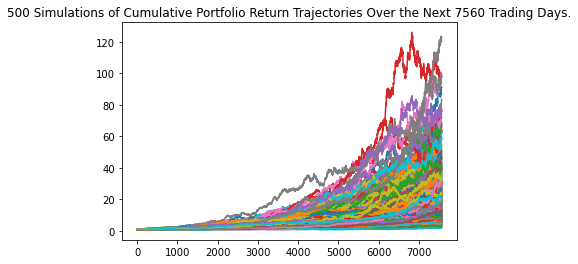

In [21]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

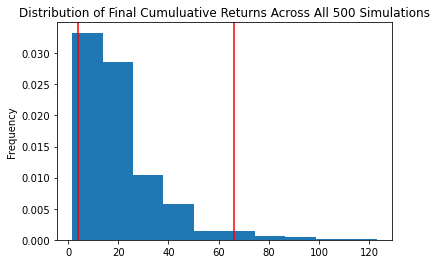

In [22]:
# Plot probability distribution and confidence intervals
MC_thirty_year.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean             21.030903
std              16.338047
min               1.618965
25%              10.448777
50%              16.043046
75%              25.952903
max             122.947513
95% CI Lower      4.112413
95% CI Upper     66.157369
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $82248.27 and $1323147.38


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $123372.4 and $1984721.07


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data=df_stock_data,
    num_simulation=num_sims,
    num_trading_days=252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001955,1.003137,1.000604,1.004130,1.000592,0.995975,0.988504,0.996170,1.000490,0.995611,...,1.000849,0.998776,0.991236,1.001972,0.990161,1.002584,1.002335,1.008789,0.988968,1.005283
2,0.999115,1.003024,1.011260,1.012337,0.998443,0.997252,0.992114,1.000112,0.987354,0.999963,...,0.998019,1.005412,0.987357,0.997277,0.994124,1.015489,1.003654,1.017002,0.988737,1.014983
3,1.000016,1.006329,1.014861,1.013589,0.991792,1.004148,0.992824,0.985109,0.983395,1.004480,...,1.013373,1.011980,0.990751,1.008380,1.000589,1.013850,1.005240,1.013103,1.000811,1.021961
4,1.009504,1.009604,1.010101,1.017132,0.995208,1.000307,0.998768,0.994953,0.999771,1.009637,...,1.012351,1.026734,0.978179,1.011593,1.010863,1.020514,0.996361,1.015912,1.010198,1.022399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.186785,1.162009,1.151048,0.912897,1.528540,1.679251,1.296234,1.592643,1.045053,1.834691,...,1.552490,1.160084,2.021687,1.669938,1.341852,1.917044,1.572406,1.814640,1.649541,1.582706
1257,1.191290,1.160032,1.152035,0.917131,1.515555,1.687812,1.293129,1.612725,1.045870,1.842259,...,1.557521,1.157885,2.021250,1.672094,1.352151,1.917582,1.561289,1.810568,1.653044,1.581151
1258,1.180397,1.160676,1.149232,0.920235,1.505654,1.691080,1.297820,1.600232,1.046181,1.844850,...,1.545778,1.147664,2.010910,1.682016,1.343426,1.917829,1.562746,1.807665,1.648545,1.584212
1259,1.175459,1.162752,1.154759,0.919035,1.495381,1.711463,1.309550,1.605525,1.052067,1.850558,...,1.534586,1.157270,2.028336,1.653830,1.337882,1.912490,1.561976,1.803218,1.647371,1.583700


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

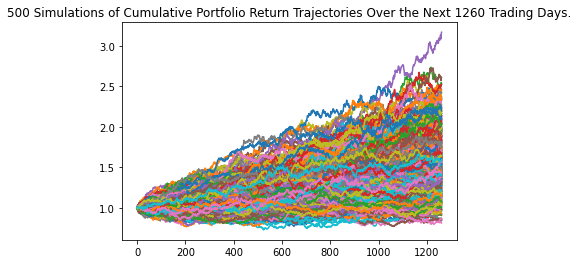

In [28]:
# Plot simulation outcomes
MC_five_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

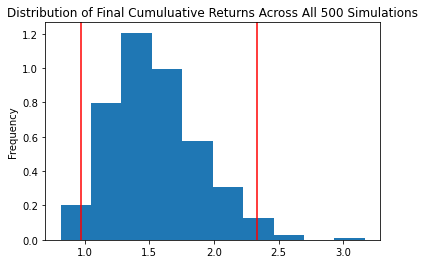

In [29]:
# Plot probability distribution and confidence intervals
MC_five_year.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              1.544703
std               0.349404
min               0.813723
25%               1.303138
50%               1.497057
75%               1.751991
max               3.168228
95% CI Lower      0.972512
95% CI Upper      2.334447
Name: 1260, dtype: float64

In [31]:
# Set initial investment
intital_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $58350.71 and $140066.8


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data=df_stock_data,
    num_simulation=num_sims,
    num_trading_days=252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989185,0.994278,0.988765,1.002117,1.006908,1.009038,0.985668,1.000428,0.989024,1.001709,...,0.997020,1.014163,1.001788,1.001790,1.005175,0.994616,0.988140,0.987502,0.998423,0.994947
2,0.977333,1.006603,0.987138,1.007387,1.000516,1.024299,0.994181,0.998996,0.993227,1.002500,...,0.988374,1.008761,0.997041,1.006243,1.003192,1.005989,0.991935,0.985096,0.998629,1.001582
3,0.970812,1.009557,0.986400,1.005838,1.005947,1.031483,0.984206,1.016810,0.996630,0.991622,...,0.983428,1.019865,0.988410,1.001911,1.007984,1.010193,0.997469,0.980052,1.006009,0.992050
4,0.963108,1.018525,0.988410,1.006827,1.003155,1.030506,0.978047,1.021858,0.997744,0.993706,...,0.967624,1.031829,0.980789,1.003307,1.008220,1.020742,1.004298,0.979627,1.004702,1.002896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.888209,2.901958,3.017568,3.149646,2.951131,2.182483,0.932121,1.638017,2.901409,2.858925,...,4.212346,1.421227,2.354246,1.659534,2.376559,4.335251,1.698187,3.068344,2.063139,1.284201
2517,1.885829,2.871226,3.030970,3.127175,2.951448,2.183092,0.924885,1.652234,2.903451,2.877907,...,4.191282,1.413650,2.369115,1.649213,2.397453,4.304815,1.719522,3.032244,2.056345,1.268431
2518,1.890346,2.854643,3.054846,3.131303,2.920855,2.183677,0.919984,1.649802,2.922405,2.873364,...,4.172269,1.408719,2.357500,1.664994,2.413618,4.290837,1.730650,3.016750,2.051984,1.284485
2519,1.875116,2.897449,3.055559,3.147199,2.933030,2.184731,0.909891,1.635298,2.900429,2.894560,...,4.182503,1.410931,2.376696,1.691671,2.403672,4.289443,1.751644,3.012974,2.053691,1.280225


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

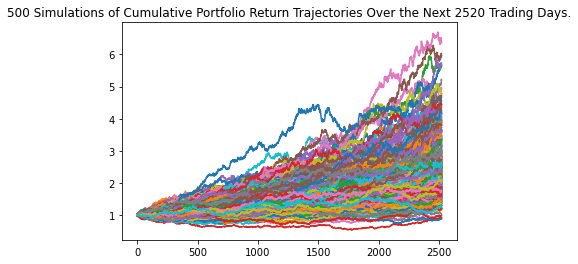

In [34]:
# Plot simulation outcomes
MC_ten_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

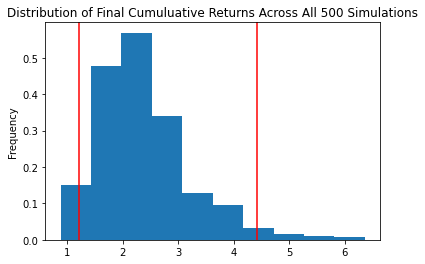

In [35]:
# Plot probability distribution and confidence intervals
MC_ten_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              2.382789
std               0.832435
min               0.881593
25%               1.815552
50%               2.264177
75%               2.732556
max               6.363054
95% CI Lower      1.205897
95% CI Upper      4.422688
Name: 2520, dtype: float64

In [37]:
# Set initial investment
intital_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000, 2)
ci_upper_ten = round(tbl[9]*60000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $72353.83 and $265361.28
